# House Price Predict

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import folium
from folium.plugins import HeatMap
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [2]:
df = pd.read_csv('kc_house_data.csv')

In [3]:
df.sample(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
3157,1827200265,20140911T000000,1899000.0,2,2.75,3690,32044,2.0,1,4,...,12,3690,0,1989,0,98166,47.4485,-122.369,2310,26988
5306,8087800020,20140515T000000,412500.0,3,1.50,1490,8475,1.0,0,0,...,7,1490,0,1963,0,98052,47.6571,-122.133,1490,8540
2369,2553300140,20141103T000000,674750.0,4,2.50,2590,9753,2.0,0,0,...,10,2590,0,1993,0,98075,47.5848,-122.027,2800,9917
12957,7956200220,20140811T000000,169500.0,3,1.00,1060,10023,1.0,0,0,...,6,1060,0,1962,0,98023,47.2869,-122.360,1060,10023
17352,3336000170,20141003T000000,335000.0,4,1.00,1480,6500,1.5,0,0,...,7,1480,0,1914,0,98118,47.5282,-122.267,2380,6000


In [4]:
column_names = df.columns

In [5]:
for i in column_names:
    print(i)

id
date
price
bedrooms
bathrooms
sqft_living
sqft_lot
floors
waterfront
view
condition
grade
sqft_above
sqft_basement
yr_built
yr_renovated
zipcode
lat
long
sqft_living15
sqft_lot15


In [6]:
evaluation = pd.DataFrame({'Model': [],
                           'Details':[],
                           'Root Mean Squared Error (RMSE)':[],
                           'R-squared (training)':[],
                           'Adjusted R-squared (training)':[],
                           'R-squared (test)':[],
                           'Adjusted R-squared (test)':[],
                           '5-Fold Cross Validation':[]})

In [7]:
type(evaluation)

pandas.core.frame.DataFrame

In [8]:
def adjustedR2(r2, n, k):
    return r2 - (k - 1)/(n - k)*(1 - r2)

*Training Model*

In [9]:
train_data, test_data = train_test_split(df, train_size = 0.8, random_state = 25)

In [10]:
linear_reg_model = linear_model.LinearRegression()
X_train = np.array(train_data['sqft_living'], dtype=pd.Series).reshape(-1, 1)
Y_train = np.array(train_data['price'], dtype=pd.Series)
linear_reg_model.fit(X_train, Y_train)

LinearRegression()

In [11]:
X_test = np.array(test_data['sqft_living'], dtype=pd.Series).reshape(-1, 1)
Y_test = np.array(test_data['price'], dtype=pd.Series)

predictions = linear_reg_model.predict(X_test)

In [12]:
rmsesm = float(format(np.sqrt(metrics.mean_squared_error(Y_test, predictions)), '.3f'))
rtrsm = float(format(linear_reg_model.score(X_train, Y_train), '.3f'))
rtesm = float(format(linear_reg_model.score(X_test, Y_test), '.3f'))

cross_validation = float(format(cross_val_score(
    linear_reg_model, df[['sqft_living']],df['price'], cv=5
).mean(), '.3f'))

In [13]:
print('Average Price for test data: {:3f}'.format(Y_test.mean()))
print('Intercept: {}'.format(linear_reg_model.intercept_))
print('Coefficient: {}'.format(linear_reg_model.coef_))

Average Price for test data: 544148.995836
Intercept: -43302.23992546729
Coefficient: [280.00665245]


In [14]:
r = evaluation.shape[0]
evaluation.loc[r] = ['Simple Linear Regression','Sqft_Living vs Price',rmsesm,rtrsm,'-',rtesm,'-',cross_validation]
evaluation

,Model,Details,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-Fold Cross Validation
0,Simple Linear Regression,-,270414.521,0.494,-,0.488,-,0.491


**Plotting results**

In [15]:
sns.set(style="white", font_scale=1)

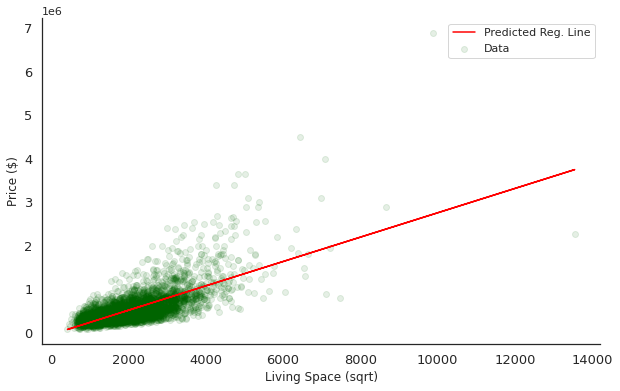

In [16]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test, Y_test, color='darkgreen', label="Data", alpha=.1)
plt.plot(X_test, linear_reg_model.predict(X_test), color="red", label="Predicted Reg. Line")

plt.xlabel("Living Space (sqrt)")
plt.ylabel("Price ($)")

plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend()

plt.gca().spines['right'].set_visible(False) # Sağdaki siyah border'ı kaldırır
plt.gca().spines['top'].set_visible(False) # Yukarıdaki siyah border'ı kaldırır

Plotting informations about houses

In [17]:
df1 = df[['price', 'bedrooms', 'bathrooms', 'sqft_living',
            'sqft_lot', 'floors', 'waterfront', 'view', 
            'condition', 'grade', 'sqft_above', 'sqft_basement', 
            'yr_built', 'yr_renovated', 'zipcode',
            'lat', 'long', 'sqft_living15', 'sqft_lot15']]

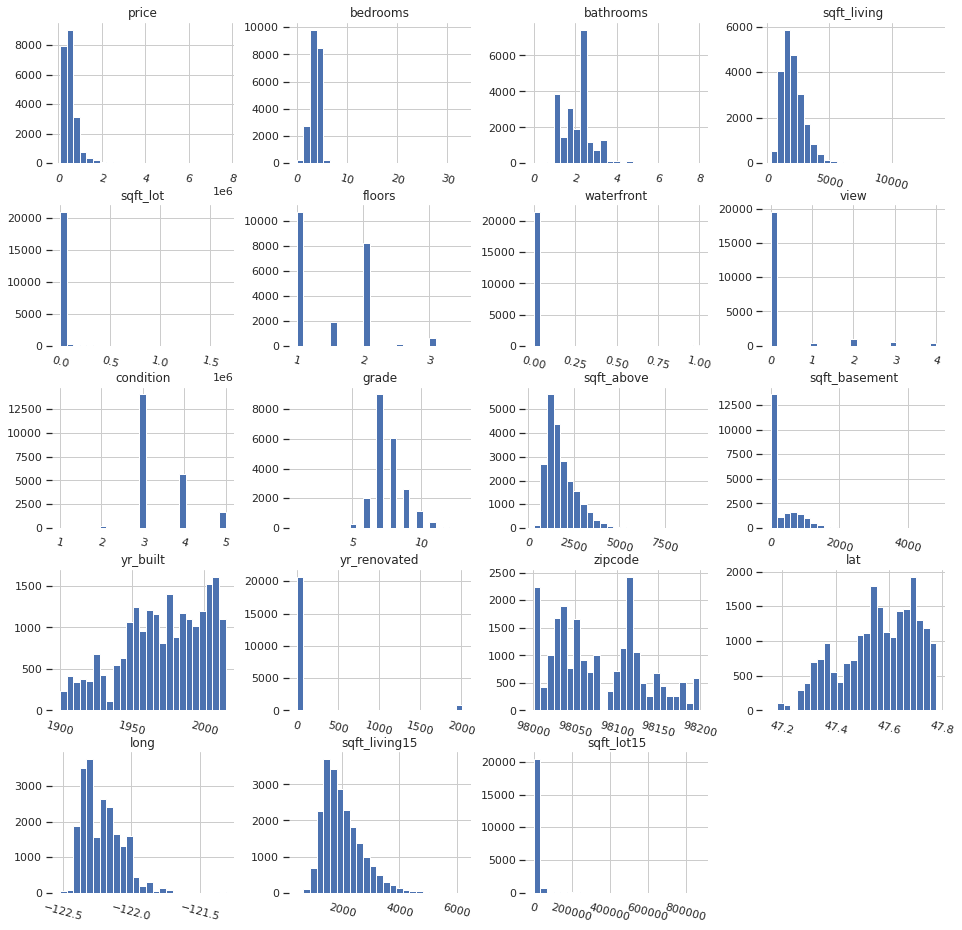

In [18]:
histogram_bar = df1.hist(bins=25, figsize=(16, 16), xrot=-15)
sns.despine(left=True, bottom=True)

[x.title.set_size(12) for x in histogram_bar.ravel()];
[x.yaxis.tick_left() for x in histogram_bar.ravel() ];

Box plot

[Text(0.5, 0, 'Floors'), Text(0, 0.5, 'Price')]

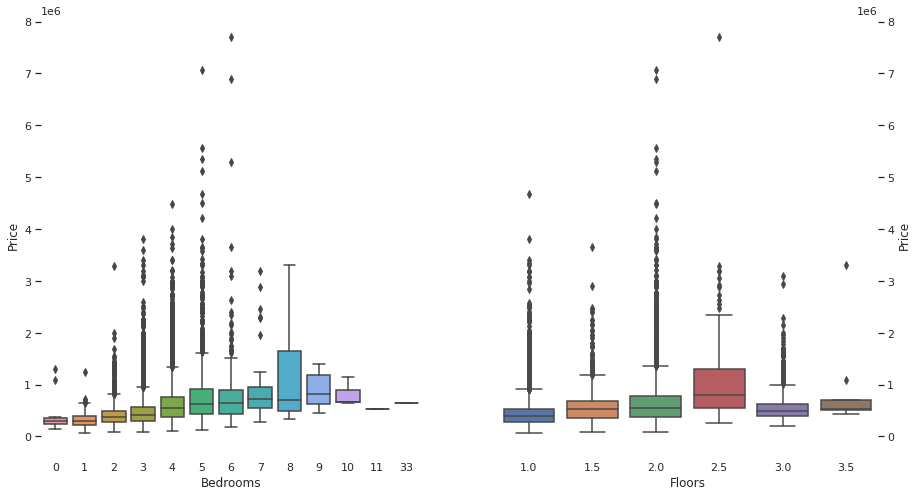

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(15, 8))
sns.boxplot(x=df['bedrooms'], y=df['price'], ax=axes[0])
sns.boxplot(x=df['floors'], y=df['price'], ax=axes[1])
sns.despine(left=True, bottom=True)

axes[0].set(xlabel="Bedrooms", ylabel="Price")
axes[0].yaxis.tick_left()

axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
axes[1].set(xlabel="Floors", ylabel="Price")

[Text(0.5, 0, 'Bathrooms / Bedrooms'), Text(0, 0.5, 'Price')]

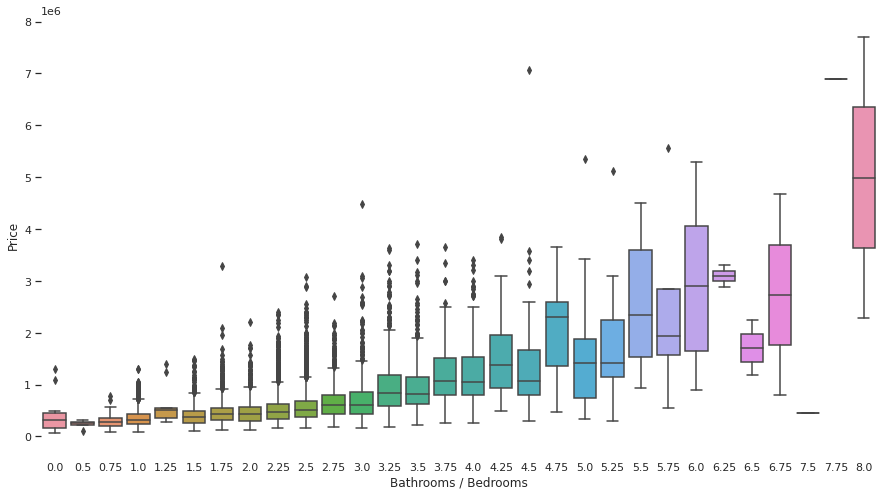

In [20]:
fig, axes2 = plt.subplots(1, 1, figsize=(15, 8))
sns.despine(left=True, bottom=True)
sns.boxplot(x=df['bathrooms'], y=df['price'], ax=axes2)
axes2.yaxis.tick_left()
axes2.set(xlabel="Bathrooms / Bedrooms", ylabel='Price')

3D Plotting

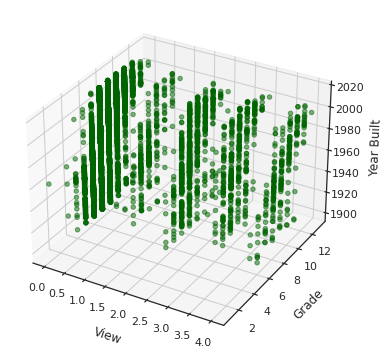

In [21]:
fig=plt.figure(figsize=(9.5,6.25))
ax=fig.add_subplot(1,1,1, projection="3d")
ax.scatter(train_data['view'],train_data['grade'],train_data['yr_built'],c="darkgreen",alpha=.5)
ax.set(xlabel='\nView',ylabel='\nGrade',zlabel='\nYear Built');

In [22]:
# find the row of the house which has the highest price
maxpr=df.loc[df['price'].idxmax()]

# define a function to draw a basemap easily
def generateBaseMap(default_location=[47.5112, -122.257], default_zoom_start=9.4):
    base_map = folium.Map(location=default_location, control_scale=True, zoom_start=default_zoom_start)
    return base_map

df_copy = df.copy()
# select a zipcode for the heatmap
#set(df['zipcode'])
#df_copy = df[df['zipcode']==98001].copy()
df_copy['count'] = 1
basemap = generateBaseMap()
# add carton position map
folium.TileLayer('cartodbpositron').add_to(basemap)
s=folium.FeatureGroup(name='icon').add_to(basemap)
# add a marker for the house which has the highest price
folium.Marker([maxpr['lat'], maxpr['long']],popup='Highest Price: $'+str(format(maxpr['price'],'.0f')),
              icon=folium.Icon(color='green')).add_to(s)
# add heatmap
HeatMap(data=df_copy[['lat','long','count']].groupby(['lat','long']).sum().reset_index().values.tolist(),
        radius=8,max_zoom=13,name='Heat Map').add_to(basemap)
folium.LayerControl(collapsed=False).add_to(basemap)
basemap

## Corelation Matrix

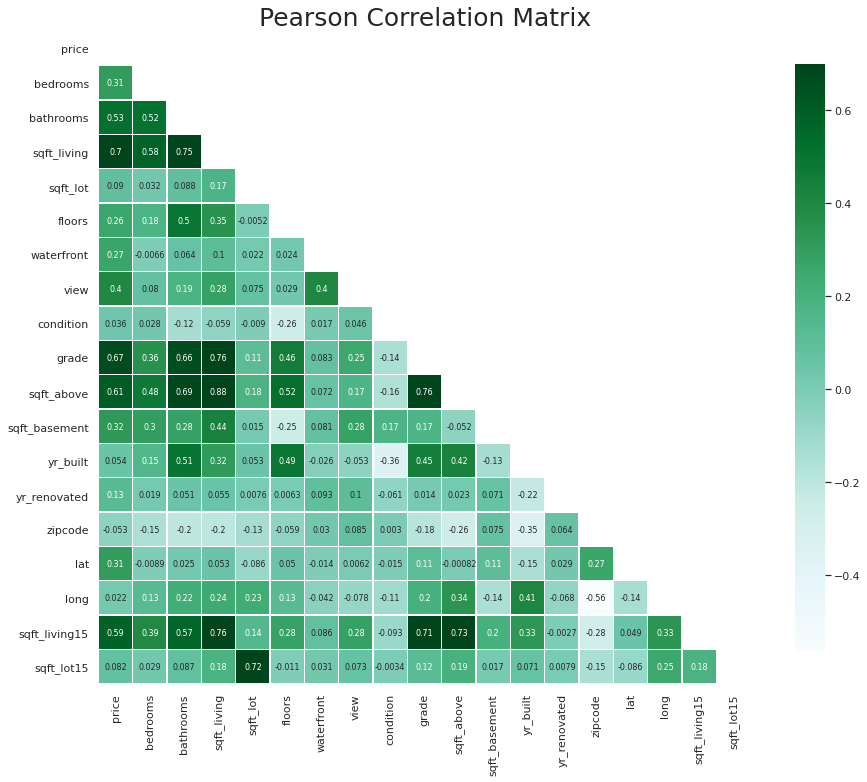

In [23]:
features = ['price','bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront',
            'view','condition','grade','sqft_above','sqft_basement','yr_built','yr_renovated',
            'zipcode','lat','long','sqft_living15','sqft_lot15']

mask = np.zeros_like(df[features].corr(), dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True 

f, ax = plt.subplots(figsize=(16, 12))
plt.title('Pearson Correlation Matrix',fontsize=25)

sns.heatmap(df[features].corr(),linewidths=0.25,vmax=0.7,square=True,cmap="BuGn", #"BuGn_r" to reverse 
            linecolor='w',annot=True,annot_kws={"size":8},mask=mask,cbar_kws={"shrink": .9});

# Data Preprocessing

In [24]:
df_copy = df.copy()
df_copy.sample(1)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
834,5066400483,20141120T000000,249900.0,3,1.75,1380,14000,1.0,0,0,...,5,1380,0,1939,1957,98001,47.294,-122.281,1490,18503


## Binding

In [25]:
# just take the year from the date column
df_copy['sales_yr']=df_copy['date'].astype(str).str[:4]

# add the age of the buildings when the houses were sold as a new column
df_copy['age']=df_copy['sales_yr'].astype(int)-df_copy['yr_built']
# add the age of the renovation when the houses were sold as a new column
df_copy['age_rnv']=0
df_copy['age_rnv']=df_copy['sales_yr'][df_copy['yr_renovated']!=0].astype(int)-df_copy['yr_renovated'][df_copy['yr_renovated']!=0]
df_copy['age_rnv'][df_copy['age_rnv'].isnull()]=0

# partition the age into bins
bins = [-2,0,5,10,25,50,75,100,100000]
labels = ['<1','1-5','6-10','11-25','26-50','51-75','76-100','>100']
df_copy['age_binned'] = pd.cut(df_copy['age'], bins=bins, labels=labels)
# partition the age_rnv into bins
bins = [-2,0,5,10,25,50,75,100000]
labels = ['<1','1-5','6-10','11-25','26-50','51-75','>75']
df_copy['age_rnv_binned'] = pd.cut(df_copy['age_rnv'], bins=bins, labels=labels)


/home/red/.local/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


/home/red/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


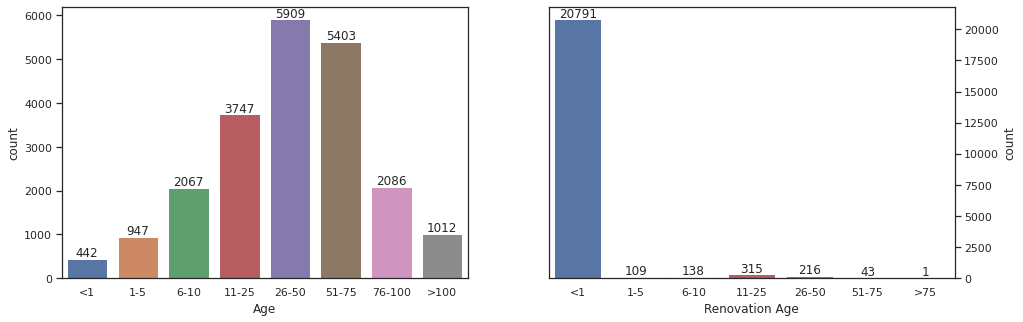

In [26]:
fig, axes = plt.subplots(1,2, figsize=(16, 5))

plot1 = sns.countplot(df_copy['age_binned'], ax=axes[0])
for plot in plot1.patches:
    height = plot.get_height()
    plot1.text(plot.get_x() + plot.get_width()/2, height + 50, height, ha="center")
    
plot2 = sns.countplot(df_copy['age_rnv_binned'], ax=axes[1])
for plot in plot2.patches:
    height=plot.get_height()
    plot2.text(plot.get_x() + plot.get_width()/2, height+200, height,ha="center")
    
axes[0].set(xlabel="Age")
axes[0].yaxis.tick_left()
axes[1].yaxis.set_label_position('right')
axes[1].yaxis.tick_right()
axes[1].set(xlabel="Renovation Age")

df_copy = pd.get_dummies(df_copy, columns=['age_binned', 'age_rnv_binned'])

# Models

## Multiple Regression 1

In [27]:
train_copy_df, test_copy_df = train_test_split(df_copy, train_size = 0.8, random_state=25)

features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode']

mul_reg_1 = linear_model.LinearRegression()
mul_reg_1.fit(train_copy_df[features], train_copy_df['price'])

print('Intercept: {}'.format(mul_reg_1.intercept_))
print('Coefficients: {}'.format(mul_reg_1.coef_))

predicted = mul_reg_1.predict(test_copy_df[features])

Intercept: -58190632.081176974
Coefficients: [-5.74658121e+04  1.45712647e+04  3.14701297e+02 -2.90813512e-01
 -5.54944899e+03  5.93923570e+02]


In [28]:
rmsecm = float(format(np.sqrt(metrics.mean_squared_error(test_copy_df['price'], predicted)), '.3f'))
rtrcm = float(format(mul_reg_1.score(train_copy_df[features], train_copy_df['price']), '.3f'))
artrcm = float(format(adjustedR2(mul_reg_1.score(train_copy_df[features], train_copy_df['price']), train_copy_df.shape[0], len(features)), '.3f'))
rtecm = float(format(mul_reg_1.score(test_copy_df[features], test_copy_df['price']), '.3f'))
artecm = float(format(adjustedR2(mul_reg_1.score(test_copy_df[features], test_data['price']), test_copy_df.shape[0], len(features)), '.3f'))

cross_validation = float(format(cross_val_score(mul_reg_1, df_copy[features], df_copy['price'], cv=5).mean(), '.3f'))

In [29]:
r = evaluation.shape[0]
evaluation.loc[r] = ['Multiple Regression-1','selected features (6)',rmsecm,rtrcm,artrcm,rtecm,artecm,cross_validation]
evaluation.sort_values(by='5-Fold Cross Validation', ascending=False)

,Model,Details,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-Fold Cross Validation
1,Multiple Regression-1,selected features,265456.828,0.517,0.517,0.507,0.506,0.512
0,Simple Linear Regression,-,270414.521,0.494,-,0.488,-,0.491


## Multiple Regression 2

In [31]:
features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view',
             'grade','age_binned_<1', 'age_binned_1-5', 'age_binned_6-10','age_binned_11-25', 
             'age_binned_26-50', 'age_binned_51-75','age_binned_76-100', 'age_binned_>100',
             'zipcode']

mul_reg_2 = linear_model.LinearRegression()
mul_reg_2.fit(train_copy_df[features], train_copy_df['price'])

print('Intercept: {}'.format(mul_reg_2.intercept_))
print('Coefficients: {}'.format(mul_reg_2.coef_))

prediction = mul_reg_2.predict(test_copy_df[features])

Intercept: 14369841.22459429
Coefficients: [-3.77684655e+04  4.86082663e+04  1.71615801e+02 -2.26738522e-01
  8.13255203e+03  5.74207190e+05  4.82000454e+04  1.21186366e+05
 -8.98288680e+04 -1.00381597e+05 -9.71172262e+04 -1.34639857e+05
 -5.49018923e+04  8.17892774e+04  1.79428967e+05  2.15651196e+05
 -1.54050507e+02]


In [45]:
def rmsecm_fn(data, pred):
    return float(format(np.sqrt(metrics.mean_squared_error(data['price'], pred)), '.3f'))

def rtrcm_fn(data, model, features):
    return float(format(model.score(data[features], data['price']), '.3f'))

def artrcm_fn(data, model, features):
    return float(format(adjustedR2(model.score(data[features], data['price']), data.shape[0], len(features)), '.3f'))

def rtecm_fn(test_data, model, features):
    return float(format(model.score(test_data[features], test_data['price']), '.3f'))

def artecm_fn(test_data, model, features):
    return float(format(adjustedR2(model.score(test_data[features],test_data['price']),test_data.shape[0],len(features)),'.3f'))

def cross_val_fn(df, model, features):
    return float(format(cross_val_score(model, df[features], df['price'], cv=5).mean(), '.3f'))

In [46]:
rmsecm = rmsecm_fn(test_copy_df, prediction)
rtrcm = rtrcm_fn(train_copy_df, mul_reg_2, features)
artrcm = artrcm_fn(train_copy_df, mul_reg_2, features)
rtecm = rtecm_fn(test_copy_df, mul_reg_2, features)
artecm = artecm_fn(test_copy_df, mul_reg_2, features)
cv = cross_val_fn(df_copy, mul_reg_2, features)

In [47]:
r = evaluation.shape[0]
evaluation.loc[r] = ['Multiple Regression-2','selected features (17)',rmsecm,rtrcm,artrcm,rtecm,artecm,cv]
evaluation.sort_values(by = '5-Fold Cross Validation', ascending=False)

,Model,Details,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-Fold Cross Validation
2,Multiple Regression-2,selected features (17),225130.187,0.655,0.655,0.645,0.644,0.648
1,Multiple Regression-1,selected features,265456.828,0.517,0.517,0.507,0.506,0.512
0,Simple Linear Regression,-,270414.521,0.494,-,0.488,-,0.491


## Multiple Regression 3

In [50]:
features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view',
            'condition','grade','sqft_above','sqft_basement','yr_built','yr_renovated',
            'zipcode','lat','long','sqft_living15','sqft_lot15']

mul_reg_3 = linear_model.LinearRegression()
mul_reg_3.fit(train_data[features], train_data['price'])

print('Intercept: {}'.format(mul_reg_3.intercept_))
print('Coefficients: {}'.format(mul_reg_3.coef_))

predicted = mul_reg_3.predict(test_data[features])

Intercept: 7164552.325533628
Coefficients: [-3.65490334e+04  4.27203571e+04  1.11801608e+02  1.08969198e-01
  7.57371151e+03  5.79660440e+05  5.46601410e+04  2.65191700e+04
  9.25746592e+04  6.85124976e+01  4.32891102e+01 -2.60082876e+03
  2.05691970e+01 -5.80959809e+02  6.06569423e+05 -2.08043478e+05
  2.27861057e+01 -3.57962299e-01]


In [51]:
rmsecm = rmsecm_fn(test_data, prediction)
rtrcm = rtrcm_fn(train_data, mul_reg_3, features)
artrcm = artrcm_fn(train_data, mul_reg_3, features)
rtecm = rtecm_fn(test_data, mul_reg_3, features)
artecm = artecm_fn(test_data, mul_reg_3, features)
cv = cross_val_fn(df, mul_reg_3, features)

In [52]:
r = evaluation.shape[0]
evaluation.loc[r] = ['Multiple Regression-3','all features, no preprocessing',rmsecm,rtrcm,artrcm,rtecm,artecm,cv]
evaluation.sort_values(by = '5-Fold Cross Validation', ascending=False)

,Model,Details,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-Fold Cross Validation
3,Multiple Regression-3,"all features, no preprocessing",225130.187,0.703,0.703,0.688,0.687,0.695
2,Multiple Regression-2,selected features (17),225130.187,0.655,0.655,0.645,0.644,0.648
1,Multiple Regression-1,selected features,265456.828,0.517,0.517,0.507,0.506,0.512
0,Simple Linear Regression,-,270414.521,0.494,-,0.488,-,0.491


In [53]:
features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront',
            'view','condition','grade','sqft_above','sqft_basement','age_binned_<1', 
            'age_binned_1-5', 'age_binned_6-10','age_binned_11-25', 'age_binned_26-50',
            'age_binned_51-75','age_binned_76-100', 'age_binned_>100','age_rnv_binned_<1',
            'age_rnv_binned_1-5', 'age_rnv_binned_6-10', 'age_rnv_binned_11-25',
            'age_rnv_binned_26-50', 'age_rnv_binned_51-75', 'age_rnv_binned_>75',
            'zipcode','lat','long','sqft_living15','sqft_lot15']

mul_reg_4 = linear_model.LinearRegression()
mul_reg_4.fit(train_copy_df[features], train_copy_df['price'])

print('Intercept: {}'.format(mul_reg_4.intercept_))
print('Coefficients: {}'.format(mul_reg_4.coef_))

predicted = mul_reg_4.predict(test_copy_df[features])

Intercept: 9673872.229041625
Coefficients: [-3.42813717e+04  3.75325378e+04  1.11551402e+02  1.25317710e-01
 -1.34006575e+04  5.90943511e+05  5.59811591e+04  3.36154546e+04
  9.22583807e+04  6.85868839e+01  4.29646392e+01 -4.25463627e+04
 -4.65886769e+04 -6.40364366e+04 -8.68742715e+04 -6.26755560e+04
  3.42485222e+04  1.15635413e+05  1.52837369e+05 -1.31734840e+04
  1.00613359e+05  7.66757067e+04  5.22991580e+04 -2.08518725e+04
 -1.15672564e+05 -7.98903037e+04 -6.62625214e+02  6.11841162e+05
 -2.09357672e+05  2.38308147e+01 -2.93755008e-01]


In [54]:
rmsecm = rmsecm_fn(test_copy_df, predicted)
rtrcm = rtrcm_fn(train_copy_df, mul_reg_4, features)
artrcm = artrcm_fn(train_copy_df, mul_reg_4, features)
rtecm = rtecm_fn(test_copy_df, mul_reg_4, features)
artecm = artecm_fn(test_copy_df, mul_reg_4, features)
cv = cross_val_fn(df_copy, mul_reg_4, features)

In [55]:
r = evaluation.shape[0]
evaluation.loc[r] = ['Multiple Regression-4','all features + preprocess',rmsecm,rtrcm,artrcm,rtecm,artecm,cv]
evaluation.sort_values(by = '5-Fold Cross Validation', ascending=False)

,Model,Details,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-Fold Cross Validation
4,Multiple Regression-4,all features,209977.875,0.706,0.706,0.691,0.689,0.698
3,Multiple Regression-3,"all features, no preprocessing",225130.187,0.703,0.703,0.688,0.687,0.695
2,Multiple Regression-2,selected features (17),225130.187,0.655,0.655,0.645,0.644,0.648
1,Multiple Regression-1,selected features,265456.828,0.517,0.517,0.507,0.506,0.512
0,Simple Linear Regression,-,270414.521,0.494,-,0.488,-,0.491


## Regularization

**When to use ridge vs lasso regression:**

* Many small/medium sized effects: use ridge.
* Only a few variables with medium/large effect: use lasso.

In [58]:
def Ridge_Model(train_data, test_data, data, features, alpha):
    ridge_reg = linear_model.Ridge(alpha=alpha)
    ridge_reg.fit(train_data[features], train_data['price'])
    prediction = ridge_reg.predict(test_data[features])
    
    rmsecm = rmsecm_fn(test_data, prediction)
    rtrcm = rtrcm_fn(train_data, ridge_reg, features)
    artrcm = artrcm_fn(train_data, ridge_reg, features)
    rtecm = rtecm_fn(test_data, ridge_reg, features)
    artecm = artecm_fn(test_data, ridge_reg, features)
    cv = cross_val_fn(data, ridge_reg, features)
    
    return rmsecm, rtrcm, artrcm, rtecm, artecm, cv

In [59]:
features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront',
            'view','condition','grade','sqft_above','sqft_basement','age_binned_<1', 
            'age_binned_1-5', 'age_binned_6-10','age_binned_11-25', 'age_binned_26-50',
            'age_binned_51-75','age_binned_76-100', 'age_binned_>100','age_rnv_binned_<1',
            'age_rnv_binned_1-5', 'age_rnv_binned_6-10', 'age_rnv_binned_11-25',
            'age_rnv_binned_26-50', 'age_rnv_binned_51-75', 'age_rnv_binned_>75',
            'zipcode','lat','long','sqft_living15','sqft_lot15']

In [63]:
rmsecm1, rtrcm1, artrcm1, rtecm1, artecm1, cv1 = Ridge_Model(train_data=train_copy_df, 
                                                            test_data=test_copy_df, 
                                                            data=df_copy, 
                                                            features=features,
                                                             alpha=1
                                                            )

In [62]:
rmsecm2, rtrcm2, artrcm2, rtecm2, artecm2, cv2 = Ridge_Model(train_data=train_copy_df, 
                                                            test_data=test_copy_df, 
                                                            data=df_copy, 
                                                            features=features,
                                                             alpha=100
                                                            )

In [64]:
rmsecm3, rtrcm3, artrcm3, rtecm3, artecm3, cv3 = Ridge_Model(train_data=train_copy_df, 
                                                            test_data=test_copy_df, 
                                                            data=df_copy, 
                                                            features=features,
                                                             alpha=10000
                                                            )

In [65]:
r = evaluation.shape[0]
evaluation.loc[r] = ['Ridge Regression','alpha=1, all features',rmsecm1,rtrcm1,artrcm1,rtecm1,artecm1,cv1]
evaluation.loc[r+1] = ['Ridge Regression','alpha=100, all features',rmsecm2,rtrcm2,artrcm2,rtecm2,artecm2,cv2]
evaluation.loc[r+2] = ['Ridge Regression','alpha=1000, all features',rmsecm3,rtrcm3,artrcm3,rtecm3,artecm3,cv3]
evaluation.sort_values(by = '5-Fold Cross Validation', ascending=False)

,Model,Details,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-Fold Cross Validation
4,Multiple Regression-4,all features,209977.875,0.706,0.706,0.691,0.689,0.698
5,Ridge Regression,"alpha=1, all features",209980.492,0.706,0.706,0.691,0.689,0.698
3,Multiple Regression-3,"all features, no preprocessing",225130.187,0.703,0.703,0.688,0.687,0.695
6,Ridge Regression,"alpha=100, all features",212451.325,0.699,0.698,0.684,0.682,0.691
2,Multiple Regression-2,selected features (17),225130.187,0.655,0.655,0.645,0.644,0.648
7,Ridge Regression,"alpha=1000, all features",245454.003,0.589,0.588,0.578,0.575,0.584
1,Multiple Regression-1,selected features,265456.828,0.517,0.517,0.507,0.506,0.512
0,Simple Linear Regression,-,270414.521,0.494,-,0.488,-,0.491


In [66]:
def Lasso_Model(train_data, test_data, data, features, alpha):
    losso_reg = linear_model.Lasso(alpha=alpha)
    losso_reg.fit(train_data[features], train_data['price'])
    prediction = losso_reg.predict(test_data[features])
    
    rmsecm = rmsecm_fn(test_data, prediction)
    rtrcm = rtrcm_fn(train_data, losso_reg, features)
    artrcm = artrcm_fn(train_data, losso_reg, features)
    rtecm = rtecm_fn(test_data, losso_reg, features)
    artecm = artecm_fn(test_data, losso_reg, features)
    cv = cross_val_fn(data, losso_reg, features)
    
    return rmsecm, rtrcm, artrcm, rtecm, artecm, cv

In [67]:
rmsecm1, rtrcm1, artrcm1, rtecm1, artecm1, cv1 = Lasso_Model(train_data=train_copy_df, 
                                                            test_data=test_copy_df, 
                                                            data=df_copy, 
                                                            features=features,
                                                             alpha=1
                                                            )

/home/red/.local/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 305564932550888.4, tolerance: 229500572602.3362
  positive)
/home/red/.local/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 305694973260707.06, tolerance: 225807564727.40997
  positive)
/home/red/.local/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 307210178110698.5, tolerance: 230623895046.63632
  positive)
/home/red/.local/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations

In [68]:
rmsecm2, rtrcm2, artrcm2, rtecm2, artecm2, cv2 = Lasso_Model(train_data=train_copy_df, 
                                                            test_data=test_copy_df, 
                                                            data=df_copy, 
                                                            features=features,
                                                             alpha=100
                                                            )

/home/red/.local/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 309638933880876.5, tolerance: 229500572602.3362
  positive)
/home/red/.local/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 309738391463846.0, tolerance: 225807564727.40997
  positive)
/home/red/.local/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 311314551912009.56, tolerance: 230623895046.63632
  positive)
/home/red/.local/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations

In [69]:
rmsecm3, rtrcm3, artrcm3, rtecm3, artecm3, cv3 = Lasso_Model(train_data=train_copy_df, 
                                                            test_data=test_copy_df, 
                                                            data=df_copy, 
                                                            features=features,
                                                             alpha=10000
                                                            )

/home/red/.local/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 457610568878079.44, tolerance: 229500572602.3362
  positive)
/home/red/.local/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 453365338468173.25, tolerance: 225807564727.40997
  positive)
/home/red/.local/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 457940585575302.75, tolerance: 230623895046.63632
  positive)
/home/red/.local/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iteratio

In [70]:
r = evaluation.shape[0]
evaluation.loc[r] = ['Lasso Regression','alpha=1, all features',rmsecm1,rtrcm1,artrcm1,rtecm1,artecm1,cv1]
evaluation.loc[r+1] = ['Lasso Regression','alpha=100, all features',rmsecm2,rtrcm2,artrcm2,rtecm2,artecm2,cv2]
evaluation.loc[r+2] = ['Lasso Regression','alpha=1000, all features',rmsecm3,rtrcm3,artrcm3,rtecm3,artecm3,cv3]
evaluation.sort_values(by = '5-Fold Cross Validation', ascending=False)

,Model,Details,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-Fold Cross Validation
4,Multiple Regression-4,all features,209977.875,0.706,0.706,0.691,0.689,0.698
5,Ridge Regression,"alpha=1, all features",209980.492,0.706,0.706,0.691,0.689,0.698
8,Lasso Regression,"alpha=1, all features",209978.636,0.706,0.706,0.691,0.689,0.698
9,Lasso Regression,"alpha=100, all features",210101.118,0.706,0.706,0.691,0.689,0.698
3,Multiple Regression-3,"all features, no preprocessing",225130.187,0.703,0.703,0.688,0.687,0.695
6,Ridge Regression,"alpha=100, all features",212451.325,0.699,0.698,0.684,0.682,0.691
2,Multiple Regression-2,selected features (17),225130.187,0.655,0.655,0.645,0.644,0.648
10,Lasso Regression,"alpha=1000, all features",239707.729,0.608,0.607,0.598,0.595,0.602
7,Ridge Regression,"alpha=1000, all features",245454.003,0.589,0.588,0.578,0.575,0.584
1,Multiple Regression-1,selected features,265456.828,0.517,0.517,0.507,0.506,0.512


In [71]:
evaluation_poly = pd.DataFrame({'Model': [],
                                'Details':[],
                                'Root Mean Squared Error (RMSE)':[],
                                'R-squared (training)':[],
                                'Adjusted R-squared (training)':[],
                                'R-squared (test)':[],
                                'Adjusted R-squared (test)':[],
                                '5-Fold Cross Validation':[]})

In [85]:
def Poly_Linear_Model(train_data, test_data, data, features, degree):
    poly_features = PolynomialFeatures(degree=degree)
    X_allpoly = poly_features.fit_transform(data[features])
    X_trainpoly = poly_features.fit_transform(train_data[features])
    X_testpoly = poly_features.fit_transform(test_data[features])
    
    poly_model = linear_model.LinearRegression()
    poly_model.fit(X_trainpoly, train_data['price'])
    
    prediction = poly_model.predict(X_testpoly)
    
    rmsepoly = float(format(np.sqrt(metrics.mean_squared_error(test_data['price'],prediction)),'.3f'))
    rtrpoly = float(format(poly_model.score(X_trainpoly,train_data['price']),'.3f'))
    rtepoly = float(format(poly_model.score(X_testpoly,test_data['price']),'.3f'))
    cv = float(format(cross_val_score(linear_model.LinearRegression(),X_allpoly,df['price'],cv=5).mean(),'.3f'))
    
    return rmsepoly, rtrpoly, rtepoly, cv

In [86]:
features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view',
             'grade','yr_built','zipcode']

In [87]:
rmsepoly1, rtrpoly1, rtepoly1, cv1 = Poly_Linear_Model(train_data=train_data, 
                                                   test_data=test_data, 
                                                   degree=2, 
                                                   data=df, 
                                                   features=features)

In [88]:
rmsepoly2, rtrpoly2, rtepoly2, cv2 = Poly_Linear_Model(train_data=train_data, 
                                                   test_data=test_data, 
                                                   degree=3, 
                                                   data=df, 
                                                   features=features)

In [89]:
features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view',
            'condition','grade','sqft_above','sqft_basement','yr_built','yr_renovated',
            'zipcode','lat','long','sqft_living15','sqft_lot15']

In [90]:
rmsepoly3, rtrpoly3, rtepoly3, cv3 = Poly_Linear_Model(train_data=train_data, 
                                                   test_data=test_data, 
                                                   degree=2, 
                                                   data=df, 
                                                   features=features)

In [91]:
rmsepoly4, rtrpoly4, rtepoly4, cv4 = Poly_Linear_Model(train_data=train_data, 
                                                   test_data=test_data, 
                                                   degree=3, 
                                                   data=df, 
                                                   features=features)

In [ ]:
def Poly_Ridge_Model(train_data, test_data, data, features, alpha, degree):
    poly_features =  PolynomialFeatures(degree=degree)
    X_allpoly = poly_features.fit_transform(data[features])
    X_trainpoly

[Source](https://www.kaggle.com/burhanykiyakoglu/predicting-house-prices#-Overview)